# Learning Through Articles
https://towardsdatascience.com/python-water-quality-eda-and-potability-analysis-ebc1cf553081


In [1]:
import sys
print (sys.version) # displays the version of python involved

3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]


In [2]:
#importing pandas and numpy
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv("water_potability.csv")

In [4]:
df.head(20)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
8,NaN,118.988579,14285.583854,7.804174,268.646941,389.375566,12.706049,53.928846,3.595017,0
9,11.180284,227.231469,25484.508491,9.077200,404.041635,563.885481,17.927806,71.976601,4.370562,0


In [5]:
df[["Potability"]].head(6) #Double square bracket are used to make a list in table form while one [] is used in normal form 

,Potability
0,0
1,0
2,0
3,0
4,0
5,0


In [6]:
df[df["Potability"]==1]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
250,9.445130,145.805402,13168.529156,9.444471,310.583374,592.659021,8.606397,77.577460,3.875165,1
251,9.024845,128.096691,19859.676476,8.016423,300.150377,451.143481,14.770863,73.778026,3.985251,1
252,NaN,169.974849,23403.637304,8.519730,NaN,475.573562,12.924107,50.861913,2.747313,1
253,6.800119,242.008082,39143.403329,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,1
254,7.174135,203.408935,20401.102461,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,1
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [7]:
df_potable = df[df["Potability"]==1]

In [8]:
df_potable.head(30)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
250,9.445130,145.805402,13168.529156,9.444471,310.583374,592.659021,8.606397,77.577460,3.875165,1
251,9.024845,128.096691,19859.676476,8.016423,300.150377,451.143481,14.770863,73.778026,3.985251,1
252,NaN,169.974849,23403.637304,8.519730,NaN,475.573562,12.924107,50.861913,2.747313,1
253,6.800119,242.008082,39143.403329,9.501695,187.170714,376.456593,11.432466,73.777275,3.854940,1
254,7.174135,203.408935,20401.102461,7.681806,287.085679,315.549900,14.533510,74.405616,3.939896,1
255,7.657991,236.960889,14245.789121,6.289065,373.165363,416.624189,10.464239,85.852769,2.437296,1
256,8.322987,207.252462,28049.646283,8.827061,297.813085,358.725869,18.709273,60.911420,4.052136,1
257,5.934279,223.858125,23249.653834,4.602850,NaN,277.384537,11.366863,66.623944,5.217895,1
258,9.802721,98.771644,27357.456745,9.218150,323.199077,512.428731,14.168934,59.454440,2.764634,1
259,6.101955,215.268090,15976.926225,8.857160,308.482695,417.843553,13.147279,62.505642,3.535596,1


In [9]:
import csv

### Read the CSV file
# Hardness_index = 1  # Assuming we want to convert the second column (Age) to a list
# Hardness_data = []

# with open('water_potability.csv', 'r') as csvfile:
#     reader = csv.reader(csvfile)
#     for row in reader:
#         Hardness_data.append(row[1])

# print(Hardness_data)


In [10]:
### Convert the desired column (e.g., 'Age') to a list
# column_data = df['Hardness'].tolist()

# print(column_data)

In [11]:
# Display information about the DataFrame - contains memory details
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [12]:
type(df.info)

method

In [13]:
info??

Object `info` not found.


In [14]:
help(df.info)

Help on method info in module pandas.core.frame:

info(verbose: 'bool | None' = None, buf: 'WriteBuffer[str] | None' = None, max_cols: 'int | None' = None, memory_usage: 'bool | str | None' = None, show_counts: 'bool | None' = None, null_counts: 'bool | None' = None) -> 'None' method of pandas.core.frame.DataFrame instance
    Print a concise summary of a DataFrame.
    
    This method prints information about a DataFrame including
    the index dtype and columns, non-null values and memory usage.
    
    Parameters
    ----------
    verbose : bool, optional
        Whether to print the full summary. By default, the setting in
        ``pandas.options.display.max_info_columns`` is followed.
    buf : writable buffer, defaults to sys.stdout
        Where to send the output. By default, the output is printed to
        sys.stdout. Pass a writable buffer if you need to further process
        the output.    max_cols : int, optional
        When to switch from the verbose to the truncat

In [15]:
# Shape of the DataFrame - shows tuple of (#Rows, #Columns)
print(df.shape)
# Find the number of rows within a DataFrame
print(len(df))
# Extracting information from the shape tuple
print(f'Number of rows: {df.shape[0]} \nNumber of columns: {df.shape[1]}')

(3276, 10)
3276
Number of rows: 3276 
Number of columns: 10


In [16]:
type(df_potable)

pandas.core.frame.DataFrame

In [17]:
###it explains the list in a very long form
df_potable??

In [18]:
#Reviewing the high level summary/analysis
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [19]:
# Transpose the summary details - easier to review larger number of features
#The count values can be interpreted as the count of non-null values. 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [20]:
df.describe?

In [21]:
# To check for missing values by column
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [22]:
# Proportion of missing values by column
def isnull_prop(df):
    total_rows = df.shape[0]
    missing_val_dict = {}
    for col in df.columns:
        missing_val_dict[col] = [df[col].isnull().sum(), (df[col].isnull().sum() / total_rows)]
    return missing_val_dict

# Apply the missing value method
null_dict = isnull_prop(df)
print(null_dict.items())


dict_items([('ph', [491, 0.14987789987789987]), ('Hardness', [0, 0.0]), ('Solids', [0, 0.0]), ('Chloramines', [0, 0.0]), ('Sulfate', [781, 0.23840048840048841]), ('Conductivity', [0, 0.0]), ('Organic_carbon', [0, 0.0]), ('Trihalomethanes', [162, 0.04945054945054945]), ('Turbidity', [0, 0.0]), ('Potability', [0, 0.0])])


In [23]:
type(df.describe)

method

In [24]:
# Create a dataframe of the missing value information
df_missing = pd.DataFrame.from_dict(null_dict, 
                                    orient="index", 
                                    columns=['missing', 'miss_percent'])
df_missing

,missing,miss_percent
ph,491,0.149878
Hardness,0,0.000000
Solids,0,0.000000
Chloramines,0,0.000000
Sulfate,781,0.238400
Conductivity,0,0.000000
Organic_carbon,0,0.000000
Trihalomethanes,162,0.049451
Turbidity,0,0.000000
Potability,0,0.000000


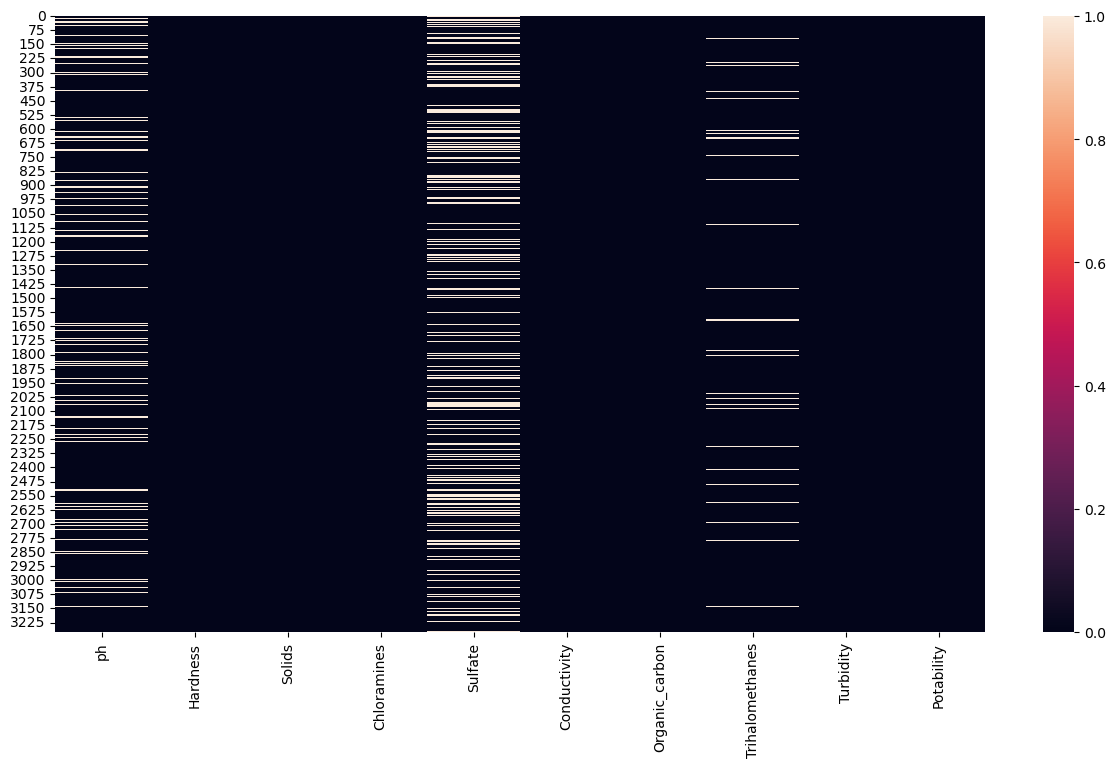

In [25]:
# Display missing values using a heatmap to understand any patterns
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull());

In [26]:
type(plt)

module

Mean pH value 7.080794504276835  
 Median pH value 7.036752103833548 
 Min pH value 0.0 
 Max pH value 13.999999999999998


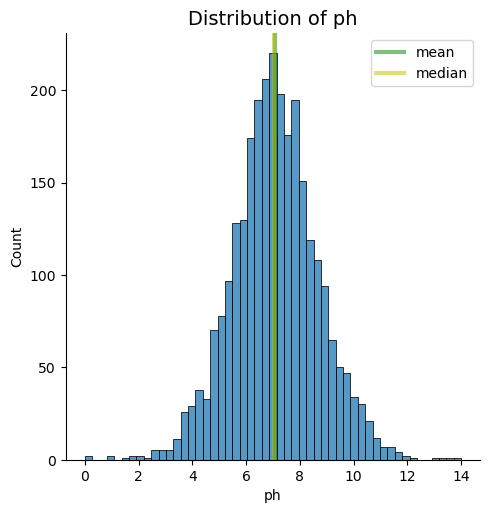

In [27]:
#Got me confused what are we using the mean and median for in this graph
# set the histogram, mean and median
sns.displot(df["ph"], kde=False)
plt.axvline(x=df.ph.mean(), linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline(x=df.ph.median(), linewidth=3, color='y', label="median", alpha=0.5)

# set title, legends and labels
plt.xlabel("ph")
plt.ylabel("Count")
plt.title("Distribution of ph", size=14)
plt.legend(["mean", "median"]);

print( f"Mean pH value {df.ph.mean()}  \n Median pH value {df.ph.median()} \n Min pH value {df.ph.min()} \n Max pH value {df.ph.max()}")